# Regression using Health Data with PyCaret
Code from https://github.com/pycaret/pycaret/

In [2]:
# check version
from pycaret.utils import version
version()

'2.3.1'

# 1. Loading Dataset

In [1]:
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
import pandas as pd
url = 'https://raw.githubusercontent.com/davidrkearney/colab-notebooks/main/datasets/strokes_training.csv'
df = pd.read_csv(url, error_bad_lines=False)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


# 2. Initialize Setup

In [5]:
from pycaret.regression import *
reg1 = setup(df, target = 'avg_glucose_level', session_id=153, log_experiment=True, experiment_name='health1')

,Description,Value
0,session_id,153
1,Target,avg_glucose_level
2,Original Data,"(43400, 12)"
3,Missing Values,True
4,Numeric Features,3
5,Categorical Features,8
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(30379, 19)"


# 3. Compare Baseline

In [6]:
best_model = compare_models(fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,29.9120,1671.5862,40.8836,0.1111,0.3360,0.2897,0.7480
lightgbm,Light Gradient Boosting Machine,29.8101,1680.0991,40.9877,0.1065,0.3369,0.2889,0.1120
ridge,Ridge Regression,30.3617,1705.3918,41.2947,0.0931,0.3394,0.2936,0.0400
lar,Least Angle Regression,30.3618,1705.3961,41.2948,0.0931,0.3394,0.2936,0.0300
br,Bayesian Ridge,30.3665,1705.4186,41.2951,0.0931,0.3394,0.2936,0.0400
lr,Linear Regression,30.3618,1705.3961,41.2948,0.0931,0.3394,0.2936,0.4600
en,Elastic Net,30.7817,1744.7248,41.7681,0.0722,0.3428,0.2971,0.0340
lasso,Lasso Regression,30.8121,1747.2784,41.7986,0.0709,0.3431,0.2974,0.2980
omp,Orthogonal Matching Pursuit,30.8859,1772.4020,42.0980,0.0575,0.3440,0.2968,0.0300
rf,Random Forest Regressor,31.0628,1783.7249,42.2324,0.0515,0.3507,0.3061,2.4020


# 4. Create Model

In [7]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,29.4483,1605.5183,40.0689,0.1065,0.3327,0.2893
1,30.1403,1696.7591,41.1917,0.1159,0.3351,0.2869
2,29.9468,1650.7967,40.6300,0.1151,0.3359,0.2924
3,30.9916,1797.2590,42.3941,0.1164,0.3429,0.2943
4,29.7740,1654.5201,40.6758,0.1206,0.3339,0.2886
5,29.4301,1644.3258,40.5503,0.1098,0.3356,0.2880
6,29.8422,1649.4613,40.6136,0.1063,0.3369,0.2940
7,30.1508,1683.2950,41.0280,0.1142,0.3346,0.2861
8,29.8594,1681.1659,41.0020,0.1008,0.3383,0.2920
9,29.4870,1635.5078,40.4414,0.1104,0.3323,0.2853


In [8]:
import numpy as np
gbrs = [create_model('gbr', learning_rate=i) for i in np.arange(0.1,1,0.1)]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,30.0877,1704.1490,41.2813,0.0517,0.3429,0.2952
1,31.1447,1869.6863,43.2399,0.0258,0.3573,0.2956
2,30.5247,1759.6697,41.9484,0.0568,0.3475,0.2990
3,31.8691,1938.1533,44.0245,0.0471,0.3581,0.3021
4,30.6442,1808.0313,42.5210,0.0390,0.3494,0.2982
5,30.0122,1742.8764,41.7478,0.0564,0.3456,0.2943
6,30.5092,1785.0937,42.2504,0.0328,0.3503,0.3013
7,30.6449,1770.6888,42.0796,0.0682,0.3457,0.2922
8,30.6724,1813.1471,42.5811,0.0302,0.3533,0.2999
9,30.3654,1773.0299,42.1074,0.0356,0.3480,0.2961


In [9]:
print(len(gbrs))

9


# 5. Tune Hyperparameters

In [10]:
tuned_gbr = tune_model(gbr, n_iter=50, optimize = 'RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,29.4002,1615.6882,40.1956,0.1009,0.3328,0.2882
1,30.0942,1699.4660,41.2246,0.1145,0.3346,0.2859
2,29.9120,1656.1440,40.6957,0.1123,0.3358,0.2914
3,30.9406,1808.0163,42.5208,0.1111,0.3430,0.2928
4,29.8471,1665.1412,40.8061,0.1149,0.3346,0.2890
5,29.4329,1643.2520,40.5370,0.1104,0.3351,0.2880
6,29.6530,1636.3363,40.4517,0.1134,0.3355,0.2918
7,30.1129,1686.1293,41.0625,0.1127,0.3343,0.2850
8,29.8222,1683.4829,41.0303,0.0996,0.3380,0.2913
9,29.3902,1638.9886,40.4844,0.1085,0.3319,0.2840


In [11]:
tuned_gbr

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=8,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.2, min_impurity_split=None,
                          min_samples_leaf=5, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=280,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=153, subsample=0.65, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

# 6. Ensemble Model

In [12]:
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,38.8967,3256.2671,57.0637,-0.8121,0.4602,0.3865
1,40.8905,3506.9767,59.2197,-0.8272,0.4737,0.3927
2,39.8432,3339.3332,57.7870,-0.7899,0.4682,0.3920
3,41.0738,3547.0195,59.5569,-0.7439,0.4741,0.3947
4,41.0748,3545.6724,59.5455,-0.8846,0.4780,0.4037
5,40.8333,3518.6152,59.3179,-0.9049,0.4776,0.4027
6,40.5197,3506.7571,59.2179,-0.9000,0.4754,0.4060
7,40.0449,3418.0876,58.4644,-0.7987,0.4696,0.3896
8,40.7124,3463.5019,58.8515,-0.8525,0.4754,0.4031
9,39.4837,3352.3464,57.8995,-0.8234,0.4671,0.3819


In [13]:
bagged_dt = ensemble_model(dt, n_estimators=50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,30.4101,1705.5270,41.2980,0.0509,0.3458,0.3031
1,31.1895,1815.9909,42.6144,0.0538,0.3495,0.2995
2,31.1459,1782.9179,42.2246,0.0443,0.3522,0.3090
3,32.1774,1926.5104,43.8920,0.0528,0.3581,0.3104
4,31.4072,1807.7021,42.5171,0.0392,0.3534,0.3106
5,30.8286,1787.9650,42.2843,0.0320,0.3533,0.3073
6,31.0847,1802.8904,42.4605,0.0232,0.3557,0.3122
7,31.2760,1797.0518,42.3916,0.0544,0.3507,0.3029
8,31.1355,1795.7085,42.3758,0.0396,0.3535,0.3108
9,30.7127,1760.7991,41.9619,0.0423,0.3486,0.3020


In [14]:
boosted_dt = ensemble_model(dt, method = 'Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,32.0837,2316.4857,48.1299,-0.2891,0.3905,0.3044
1,32.8474,2379.9324,48.7846,-0.2400,0.3920,0.3000
2,32.5372,2325.1765,48.2201,-0.2463,0.3920,0.3091
3,33.3153,2448.9699,49.4871,-0.2040,0.3948,0.3026
4,32.6835,2316.9897,48.1351,-0.2315,0.3894,0.3049
5,32.3224,2299.7394,47.9556,-0.2450,0.3899,0.3068
6,32.6263,2307.7303,48.0388,-0.2503,0.3927,0.3125
7,32.4531,2287.3343,47.8261,-0.2036,0.3883,0.3019
8,32.1537,2270.1737,47.6463,-0.2142,0.3867,0.3068
9,31.9558,2247.6878,47.4098,-0.2225,0.3851,0.2979


# 9. Analyze Model

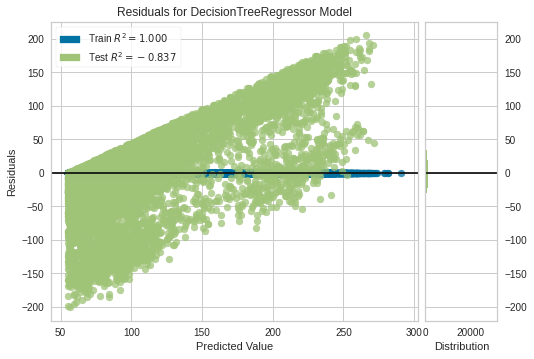

In [17]:
plot_model(dt)

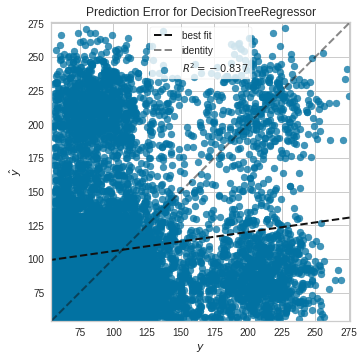

In [18]:
plot_model(dt, plot = 'error')

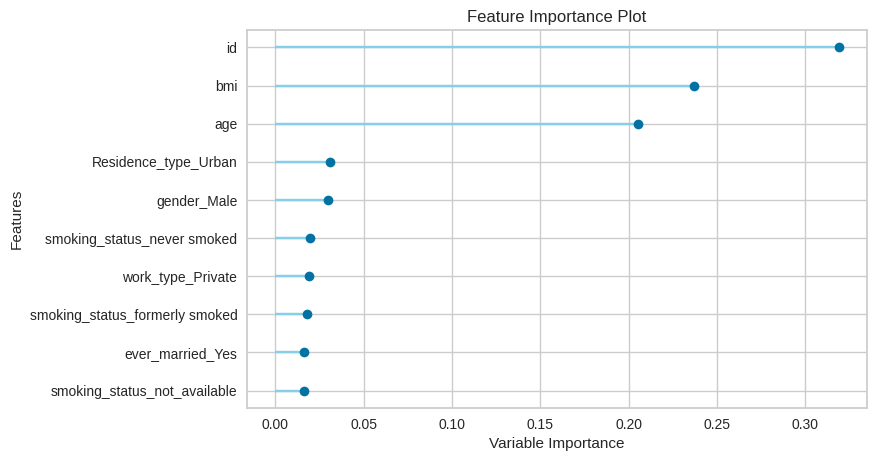

In [19]:
plot_model(dt, plot = 'feature')

In [20]:
evaluate_model(dt)

,Parameters
ccp_alpha,0.0
criterion,mse
max_depth,None
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0
min_impurity_split,None
min_samples_leaf,1
min_samples_split,2
min_weight_fraction_leaf,0.0


# 10. Interpret Model

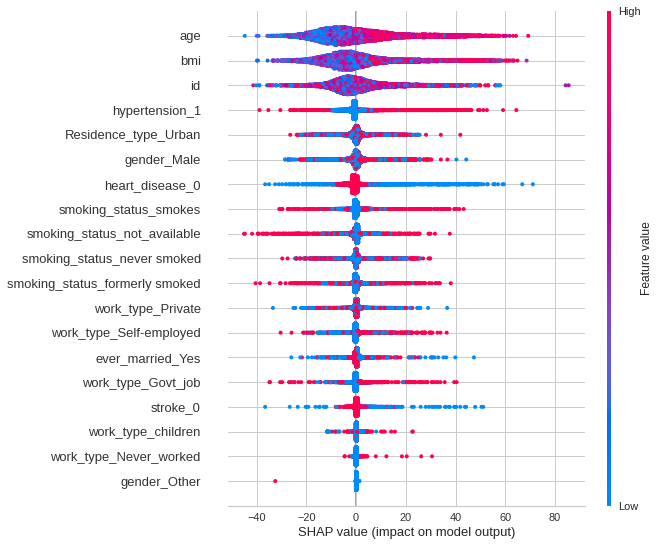

In [25]:
interpret_model(dt)

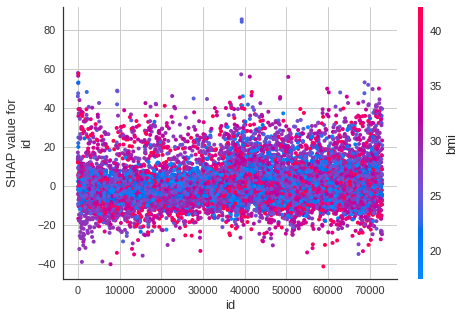

In [26]:
interpret_model(dt, plot = 'correlation')

In [27]:
interpret_model(dt, plot = 'reason', observation = 12)

# 11. AutoML()

In [28]:
best = automl(optimize = 'MAE')
best

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=153, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

# 12. Predict Model

In [30]:
pred_holdouts = predict_model(dt)
pred_holdouts.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,39.4954,3317.2600,57.5957,-0.8368,0.4665,0.3924


,id,age,bmi,gender_Male,gender_Other,hypertension_1,heart_disease_0,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,...,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_not_available,smoking_status_smokes,stroke_0,avg_glucose_level,Label
0,22489.0,55.0,41.099998,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,99.110001,109.269997
1,26145.0,17.0,16.200001,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,83.470001,73.949997
2,34373.0,0.4,20.200001,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,76.430000,92.430000
3,60599.0,69.0,32.500000,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,80.370003,86.099998
4,54268.0,35.0,27.200001,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,151.589996,175.320007


In [34]:
new_data = df.copy()
new_data.drop(['avg_glucose_level'], axis=1, inplace=True)
predict_new = predict_model(best, data=new_data)
predict_new.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,bmi,smoking_status,stroke,Label
0,30669,Male,3.0,0,0,No,children,Rural,18.0,NaN,0,91.930029
1,30468,Male,58.0,1,0,Yes,Private,Urban,39.2,never smoked,0,143.044226
2,16523,Female,8.0,0,0,No,Private,Urban,17.6,NaN,0,91.227274
3,56543,Female,70.0,0,0,Yes,Private,Rural,35.9,formerly smoked,0,123.386541
4,46136,Male,14.0,0,0,No,Never_worked,Rural,19.1,NaN,0,97.715823


# 13. Save / Load Model

In [35]:
save_model(best, model_name='best-model')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='avg_glucose_level',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeri...
                  LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min

In [36]:
loaded_bestmodel = load_model('best-model')
print(loaded_bestmodel)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='avg_glucose_level',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeri...
                 LGBMRegressor(boosting_type='gbdt', class_weight=None,
                               colsample_bytree=1.0, importance_type='split',
                               learning_rate=0.1, max_depth=-1,
                   

In [37]:
from sklearn import set_config
set_config(display='diagram')
loaded_bestmodel[0]

DataTypes_Auto_infer(categorical_features=[], display_types=True,
                     features_todrop=[], id_columns=[], ml_usecase='regression',
                     numerical_features=[], target='avg_glucose_level',
                     time_features=[])

In [38]:
from sklearn import set_config
set_config(display='text')

# 14. Deploy Model

In [40]:
#deploy_model(best, model_name = 'best-aws', authentication = {'bucket' : 'pycaret-test'})

# 15. Get Config / Set Config

In [41]:
X_train = get_config('X_train')
X_train.head()

,id,age,bmi,gender_Male,gender_Other,hypertension_1,heart_disease_0,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_not_available,smoking_status_smokes,stroke_0
41231,51687.0,55.0,25.799999,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
21949,11886.0,38.0,19.500000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
12409,18294.0,4.0,18.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
9632,35206.0,37.0,29.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
15044,69458.0,41.0,38.299999,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [42]:
get_config('seed')

153

In [43]:
from pycaret.regression import set_config
set_config('seed', 999)

In [44]:
get_config('seed')

999

# 16. MLFlow UI

In [ ]:
!mlflow ui

[2021-05-29 11:34:03 -0500] [17806] [INFO] Starting gunicorn 20.0.4
[2021-05-29 11:34:03 -0500] [17806] [INFO] Listening at: http://127.0.0.1:5000 (17806)
[2021-05-29 11:34:03 -0500] [17806] [INFO] Using worker: sync
[2021-05-29 11:34:03 -0500] [17808] [INFO] Booting worker with pid: 17808
